In [1]:
from implicit.datasets.lastfm import get_lastfm

/usr/local/lib/python3.8/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [2]:
artists, users, artist_user_plays = get_lastfm()

In [250]:
import numpy as np
import pandas as pd
import scipy.sparse

from numpy import bincount, log, log1p
from scipy.sparse import coo_matrix, linalg
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
from implicit.nearest_neighbours import bm25_weight

In [11]:
artist_user_plays = bm25_weight(artist_user_plays, K1=100, B=0.8)

In [4]:
df = pd.DataFrame.sparse.from_spmatrix(artist_user_plays)
df

,0,1,2,3,4,5,6,7,8,9,...,358858,358859,358860,358861,358862,358863,358864,358865,358866,358867
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
data = pd.read_csv('/content/drive/MyDrive/DSAIL/usersha1-artmbid-artname-plays.tsv', sep='\t', header=None, names=['user', 'artist', 'plays'], usecols=[0,2,3])

In [142]:
data

,user,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
...,...,...,...
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10


In [143]:
data[(data['plays']<100000) & (data['plays']>10000)]

,user,artist,plays
49,00001411dc427966b17297bf4d69e7e193135d89,the most serene republic,12763
891,00029d80b8af94f2d5e3349ceb28b7304f80c1c4,nine inch nails,11092
10692,00277ccecc376837e57b6d6b58330d1bafc90c73,ac/dc,17087
11311,0028ee93676310a78387c6cfad928ce8f3ea50a2,new order,18941
14451,0033ee7378661b88b245b1f67cc622ff63a51061,the beatles,39655
...,...,...,...
17517986,ffb675bf47413af2bb82151904a61e3dbbd5fb1d,ja rule,12733
17518725,ffba5496d4a7ea01f70b05806a8689d6f25d777b,bill evans,29487
17519147,ffbbd9e0a6c65bf15f076e8c97fe9c94cdfe456c,tool,35435
17520346,ffc029b0209a08e0da67dfe6bba7c580c005bb38,sonic youth,11975


In [144]:
artist_count = data.groupby('artist')['user'].count()
artist_count.sort_values(ascending=False)[:100]

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
                         ...  
beirut                   16750
cat power                16710
jimi hendrix             16690
black sabbath            16658
aphex twin               16539
Name: user, Length: 100, dtype: int64

In [145]:
artist_count.sort_values(ascending=False)[:2000]

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
                         ...  
four year strong          1451
acceptance                1450
annie                     1450
necro                     1450
the beautiful south       1449
Name: user, Length: 2000, dtype: int64

In [146]:
user_count = data.groupby('user')['artist'].count()
user_count.sort_values(ascending=False)[:1000]

user
2040b3d3cb47caace19e728090a88d6b1087aa8e    166
13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5    166
52bf0682648b44e6cc27ebe512dd4fa3455a11c2    150
7679da839e1a6c2d299c7fd6834fb9bf6e229224    139
8d8643cded0ac18e66a3c5a2b74de21fbca0e6b7    132
                                           ... 
b3677ebc22eaab611c8d3c50f41961d6af7a7b57     84
a9cca039bdf71f6b46a740720d6bb3948bd5841f     84
32043d80067d9f383ddd16266e0a3adcfe5e76fa     84
d1de047744abcec84ec2a97ce820c7901fbbf266     84
b4ef1b63fc188fc7953892f214f636f9d556f0b1     84
Name: artist, Length: 1000, dtype: int64

In [147]:
user_index = user_count.sort_values(ascending=False)[:1000].index

In [148]:
item_index = artist_count.sort_values(ascending=False)[:2000].index

In [158]:
df_user = data[data['user'] == user_index[0]]
for i in range(1,1000):
    df_user = pd.concat([ df_user, data[data['user'] == user_index[i]] ])

In [ ]:
df_item = data[data['artist'] == item_index[0]]
for i in range(1,2000):
    df_item = pd.concat([ df_item, data[data['artist'] == item_index[i]] ])
    print(i)

In [161]:
intersected_df = pd.merge(df_user, df_item, how='inner')
print(intersected_df)

                                           user                  artist  plays
0      2040b3d3cb47caace19e728090a88d6b1087aa8e                  pixies    757
1      2040b3d3cb47caace19e728090a88d6b1087aa8e              tiger army    613
2      2040b3d3cb47caace19e728090a88d6b1087aa8e  leevi and the leavings    444
3      2040b3d3cb47caace19e728090a88d6b1087aa8e              the smiths    427
4      2040b3d3cb47caace19e728090a88d6b1087aa8e              the adicts    372
...                                         ...                     ...    ...
39854  b4ef1b63fc188fc7953892f214f636f9d556f0b1              elton john     11
39855  b4ef1b63fc188fc7953892f214f636f9d556f0b1                  eagles      4
39856  b4ef1b63fc188fc7953892f214f636f9d556f0b1         robbie williams      4
39857  b4ef1b63fc188fc7953892f214f636f9d556f0b1              bob marley      3
39858  b4ef1b63fc188fc7953892f214f636f9d556f0b1           nat king cole      3

[39859 rows x 3 columns]


In [162]:
intersected_df.to_csv('drive/My Drive/DSAIL/intersected_df.csv', index=False)

In [163]:
df_user

,user,artist,plays
2214725,2040b3d3cb47caace19e728090a88d6b1087aa8e,perkele,837
2214726,2040b3d3cb47caace19e728090a88d6b1087aa8e,the murder city devils,761
2214727,2040b3d3cb47caace19e728090a88d6b1087aa8e,pixies,757
2214728,2040b3d3cb47caace19e728090a88d6b1087aa8e,tragedy,662
2214729,2040b3d3cb47caace19e728090a88d6b1087aa8e,tiger army,613
...,...,...,...
12377607,b4ef1b63fc188fc7953892f214f636f9d556f0b1,the champs,3
12377608,b4ef1b63fc188fc7953892f214f636f9d556f0b1,the coasters,3
12377609,b4ef1b63fc188fc7953892f214f636f9d556f0b1,the fortunes,3
12377610,b4ef1b63fc188fc7953892f214f636f9d556f0b1,the rubettes,3


In [164]:
df_item

,user,artist,plays
221,00007a47085b9aab8af55f52ec8846ac479ac4fe,radiohead,86
245,0000c176103e538d5c9828e695fed4f7ae42dd01,radiohead,2417
530,000163263d2a41a3966a3746855b8b75b7d7aa83,radiohead,252
709,000215d3060a5b0ab7b3c415d49ec579100d4c87,radiohead,81
1119,00035a0368fd249d286f683e816fbdc97cbfa7d9,radiohead,1437
...,...,...,...
17406502,fe1bbfe0741572593f803167607c2af53ec351b9,the beautiful south,238
17418330,fe4568a6f7b52b173682f4de0605943b49bbfbb0,the beautiful south,48
17456958,fed6ca23ac56f1bb25869c8470db9630c7016b99,the beautiful south,308
17457836,fed979e36185b0def0c90432c30e91b6114ba27b,the beautiful south,15


In [135]:
user_index

Index(['2040b3d3cb47caace19e728090a88d6b1087aa8e',
       '13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5',
       '52bf0682648b44e6cc27ebe512dd4fa3455a11c2',
       '7679da839e1a6c2d299c7fd6834fb9bf6e229224',
       '8d8643cded0ac18e66a3c5a2b74de21fbca0e6b7',
       'ce52b233f731dda7325aae6242440bd2a7095fca',
       '0a7c493718902fe4590cad2f76db9abb6dce6fae',
       '209b31e32790bdaa80e76ce9bb97e13e3980e1a5',
       'e710c9f69c2d07f914e7b1fa533b3e9f27890d62',
       'e85a4c61ca10501e09c979d411e984afc0a2393e',
       ...
       '95003c289d8f8ac2f08179bb54d9f891b75b4bb6',
       '8d371a192ac7835283d635ac2f3aef085bb735b4',
       '83a9d0fb45851d714aad419850cbec01e4ddaba4',
       '0cb7f9355f572ca7bef8138253c94b5e4dcdb83a',
       '10efd8ef11060a888cc49b10c203813ff3800cc7',
       'b3677ebc22eaab611c8d3c50f41961d6af7a7b57',
       'a9cca039bdf71f6b46a740720d6bb3948bd5841f',
       '32043d80067d9f383ddd16266e0a3adcfe5e76fa',
       'd1de047744abcec84ec2a97ce820c7901fbbf266',
       'b4ef1b63fc18

In [136]:
item_index.values

array(['radiohead', 'the beatles', 'coldplay', ..., 'annie', 'necro',
       'the beautiful south'], dtype=object)

In [125]:
data2 = data[(data['plays']<100000) & (data['plays']>10000)]

In [126]:
data2

,user,artist,plays
49,00001411dc427966b17297bf4d69e7e193135d89,the most serene republic,12763
891,00029d80b8af94f2d5e3349ceb28b7304f80c1c4,nine inch nails,11092
10692,00277ccecc376837e57b6d6b58330d1bafc90c73,ac/dc,17087
11311,0028ee93676310a78387c6cfad928ce8f3ea50a2,new order,18941
14451,0033ee7378661b88b245b1f67cc622ff63a51061,the beatles,39655
...,...,...,...
17517986,ffb675bf47413af2bb82151904a61e3dbbd5fb1d,ja rule,12733
17518725,ffba5496d4a7ea01f70b05806a8689d6f25d777b,bill evans,29487
17519147,ffbbd9e0a6c65bf15f076e8c97fe9c94cdfe456c,tool,35435
17520346,ffc029b0209a08e0da67dfe6bba7c580c005bb38,sonic youth,11975


In [131]:
user_count = data.groupby('user')['artist'].count()
user_count

user
00000c289a1829a808ac09c00daf10bc3c4e223b    49
00001411dc427966b17297bf4d69e7e193135d89    51
00004d2ac9316e22dc007ab2243d6fcb239e707d    46
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf    49
00007a47085b9aab8af55f52ec8846ac479ac4fe    50
                                            ..
fffe8637bd8234309e871409c7ebef99a720afc1    48
fffe8c7f952d9b960a56ed4dcb40a415d924b224    62
ffff9af9ae04d263dae91cb838b1f3a6725f5ffb    21
ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac    50
sep 20, 2008                                48
Name: artist, Length: 358868, dtype: int64

In [120]:
train, test = train_test_split(data2, test_size=0.2, shuffle=True, random_state=1)

In [121]:
train

,user,artist,plays
27363,006261139d787c1e43b4c69d304f2772367c1005,depeche mode,12103
10109186,93a3fb09288dd8322252a5a4f65a418063b83a28,christina aguilera,38417
7504828,6da35f677fdb5a5e4063abaf2a4209fe1ca984dd,billy joel,33677
10060869,92ec9bb191ee0b58080dbfeced1eef354cf8d6a7,the rolling stones,11659
6989297,662b37e305a87a89607dcc9e7ab7c083d027b5b0,the beatles,15207
...,...,...,...
2711813,27b21af1ca2f83290170f4aa6855168204defa9d,madonna,20042
15762336,e64b838357df65163c6fb6e7512c84619bfa15fa,tori amos,13454
12109133,b10dd7f531bc7ce3655914afca52e8c63fd0bcd9,u2,48187
721174,0a8a015edc1138a425832928196877736e863015,l'arc~en~ciel,11978


In [122]:
test

,user,artist,plays
9930240,9107e54b8020edc73db7397659cdeb44f2cd19d0,kanye west,13428
12362884,b4bc7b1b3307b53547dcfef0d1a7d941f614c401,the prodigy,10320
12811629,bb4ef229f5ababb9add6acd065b3b32e50a5a3f1,in flames,13482
1010778,0ebecedb3cef2347ebab2936d30c1a488b8c43d0,marcelo camelo,18474
3046981,2c883fe7deb79e621d2abca3004654f63709e072,ozma,11200
...,...,...,...
3129891,2dba7c3bc2eddf8ef372f839b7f7582287813ada,media lab,12102
5503018,5087ff3998fbde168ed40184359be70f64da7987,gorillaz,13103
1251231,123ef0268776ff028dc36ec78babdd8b9380192e,epica,18261
1259587,125f0dc97529e4995b4ef34e387540a6faa4f03f,beck,11394


In [2]:
data = pd.read_csv('/content/drive/MyDrive/DSAIL/intersected_df.csv')

In [3]:
data

,user,artist,plays
0,2040b3d3cb47caace19e728090a88d6b1087aa8e,pixies,757
1,2040b3d3cb47caace19e728090a88d6b1087aa8e,tiger army,613
2,2040b3d3cb47caace19e728090a88d6b1087aa8e,leevi and the leavings,444
3,2040b3d3cb47caace19e728090a88d6b1087aa8e,the smiths,427
4,2040b3d3cb47caace19e728090a88d6b1087aa8e,the adicts,372
...,...,...,...
39854,b4ef1b63fc188fc7953892f214f636f9d556f0b1,elton john,11
39855,b4ef1b63fc188fc7953892f214f636f9d556f0b1,eagles,4
39856,b4ef1b63fc188fc7953892f214f636f9d556f0b1,robbie williams,4
39857,b4ef1b63fc188fc7953892f214f636f9d556f0b1,bob marley,3


In [171]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [224]:
class ImplicitCF:
    def __init__(self, dataframe):
        self.df = dataframe
        self.df['user'] = self.df['user'].astype("category")
        self.df['artist'] = self.df['artist'].astype("category")
        self.df.dropna(inplace=True)
        
        self.plays = coo_matrix((self.df['plays'].astype(float),
                                  (self.df['artist'].cat.codes,
                                  self.df['user'].cat.codes)))

    def _alternating_least_squares(self, Rui, factors, regularization, iterations):
        Cui = 40*(Rui/10**-8).log1p() #Log scaling

        artists, users = Cui.shape

        X = np.random.rand(artists, factors) 
        Y = np.random.rand(users, factors) 

        Ciu = Cui.T.tocsr()
        for iteration in range(iterations):
            self._least_squares(Cui, X, Y, regularization)
            self._least_squares(Ciu, Y, X, regularization)

        return X, Y

    def _least_squares(self, Cui, X, Y, regularization):
        artists, factors = X.shape
        YtY = Y.T.dot(Y)

        for u in range(artists):
            # accumulate YtCuY + regularization * I in A
            A = YtY + regularization * np.eye(factors)

            # accumulate YtCuPu in b
            b = np.zeros(factors)

            for i in Cui[u,:].indices: #only nonzero values
                confidence = Cui[u,i] #C_ui
                factor = Y[i] #y_i
                A += (confidence - 1) * np.outer(factor, factor) #Sigma(C_ui*p_ui*y_i) 
                b += confidence * factor #Sigma(C_ui*p_ui*y_i) 

            # Xu = (YtCuY + regularization * I)^-1 (YtCuPu)
            X[u] = np.linalg.solve(A, b)
    
    def factorize(self, factors, regularization, iterations):
        artist_factor, user_factor = self._alternating_least_squares(self.plays.tocsr(), factors, regularization, iterations)
        return artist_factor, user_factor



In [225]:
cf_object = ImplicitCF(train)

In [226]:
print(cf_object.df.head())

                                           user          artist  plays
3716   bf07cdf8740e7d6bcf3ece323ac32b0c4418c228     the killers    186
9918   2c5b95d6e1652793cb52065caaf268fd998b378a        mstrkrft     13
13667  7c9c955253a1369bfdd9aaa9e162d3ef7e4e4fc2  nouvelle vague    135
5024   eed5a1599e7ea5961864698fb9568f5194e49f58            mxpx    164
11271  52f33c9d2f211fad64c0a629bb472012a3696542     sonic youth     41


In [227]:
print(cf_object.df.user.nunique()) # 358868
print(cf_object.df.artist.nunique()) # 292364
print(cf_object.df.plays.describe())

1000
1995
count    31887.000000
mean       131.002509
std        346.749472
min          1.000000
25%         18.000000
50%         49.000000
75%        127.000000
max      25071.000000
Name: plays, dtype: float64


In [228]:
print(cf_object.plays.shape) # (292364, 358868)

(1999, 1000)


In [239]:
artist_factor, user_factor = cf_object.factorize(50,0,10)
print(artist_factor.shape) # (292364, 50)
print(user_factor.shape) # (358868, 50)

(1999, 50)
(1000, 50)


In [240]:
cf_object.init_predict(artist_factor)

<ipython-input-224-3997827bbdc5>:68: RuntimeWarning: invalid value encountered in true_divide
  self.factors = x_factors / norms[:, np.newaxis]


In [241]:
array = user_factor.dot(artist_factor.T)
order = array.argsort()
ranks = order.argsort()/1998

In [242]:
ranks

array([[0.03603604, 0.26176176, 0.42542543, ..., 0.57957958, 0.34884885,
        0.6966967 ],
       [0.72272272, 0.35835836, 0.4984985 , ..., 0.51401401, 0.3993994 ,
        0.27277277],
       [0.33033033, 0.38788789, 0.31931932, ..., 0.36036036, 0.43343343,
        0.76026026],
       ...,
       [0.19419419, 0.53853854, 0.79329329, ..., 0.6011011 , 0.3018018 ,
        0.08258258],
       [0.56106106, 0.32182182, 0.19319319, ..., 0.53453453, 0.45345345,
        0.48798799],
       [0.66066066, 0.28228228, 0.54104104, ..., 0.45745746, 0.26076076,
        0.41841842]])

In [243]:
ranks.shape

(1000, 1999)

In [244]:
cf_object_test = ImplicitCF(test)

In [245]:
coo_matrix.todense(cf_object_test.plays.T).shape

(1000, 1999)

In [247]:
np.multiply(coo_matrix.todense(cf_object_test.plays.T), (1-ranks) ).sum() / coo_matrix.todense(cf_object_test.plays.T).sum()

0.20441932406631505

In [254]:
cf_object_test = ImplicitCF(test)
list_rank = []
for regularize in [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]:
    artist_factor, user_factor = cf_object.factorize(50,regularize,10)
    cf_object.init_predict(artist_factor)

    array = user_factor.dot(artist_factor.T)
    order = array.argsort()
    ranks = order.argsort()/1998
    
    mean_rank = np.multiply(coo_matrix.todense(cf_object_test.plays.T), (1-ranks) ).sum() / coo_matrix.todense(cf_object_test.plays.T).sum()
    list_rank.append(mean_rank)

<ipython-input-224-3997827bbdc5>:68: RuntimeWarning: invalid value encountered in true_divide
  self.factors = x_factors / norms[:, np.newaxis]


In [255]:
list_rank

[0.21444556633400416,
 0.13494310739919946,
 0.1213741545278327,
 0.12279158276871815,
 0.12521311929204923,
 0.1309728217172646,
 0.14069902681230856,
 0.15369245246921567,
 0.17177001968117328,
 0.19749825655355208,
 0.23328549955226424]

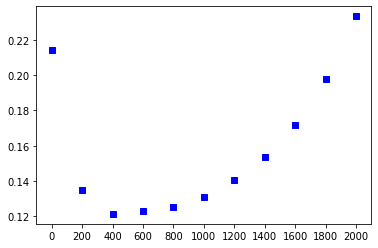

In [261]:
plt.plot([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, ],list_rank, 'bs')
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.show()

In [257]:
regularize = 400
list_factors = []

for factors in [0, 20, 40, 60, 80, 100 ,120, 140, 160, 180, 200]:
    artist_factor, user_factor = cf_object.factorize(factors,regularize,10)
    cf_object.init_predict(artist_factor)

    array = user_factor.dot(artist_factor.T)
    order = array.argsort()
    ranks = order.argsort()/1998 # max(ranks) = 1998, min(ranks) = 0
    
    mean_rank = np.multiply(coo_matrix.todense(cf_object_test.plays.T), (1-ranks) ).sum() #Expected rank
    / coo_matrix.todense(cf_object_test.plays.T).sum()

    list_factors.append(mean_rank)    

<ipython-input-224-3997827bbdc5>:68: RuntimeWarning: invalid value encountered in true_divide
  self.factors = x_factors / norms[:, np.newaxis]


In [258]:
list_factors

[0.5447856758659498,
 0.1324458846252286,
 0.12353287598920332,
 0.12023040113070971,
 0.118445671318111,
 0.11756784075511968,
 0.11715561119140046,
 0.11811531852231255,
 0.11682749561861294,
 0.11798684529161617,
 0.11721519424548199]

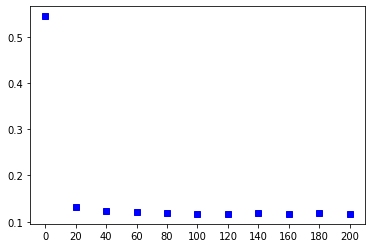

In [262]:
plt.plot([0, 20, 40, 60, 80, 100 ,120, 140, 160, 180, 200],list_factors, 'bs')
plt.xticks([0, 20, 40, 60, 80, 100 ,120, 140, 160, 180, 200])
plt.show()

In [269]:
regularize = 400
factors = 100
list_iteration = []

for iteration in [0, 50, 100, 150, 200, 250, 300]:
    artist_factor, user_factor = cf_object.factorize(factors,regularize, iteration)
    cf_object.init_predict(artist_factor)

    array = user_factor.dot(artist_factor.T)
    order = array.argsort()
    ranks = order.argsort()/1998
    
    mean_rank = np.multiply(coo_matrix.todense(cf_object_test.plays.T), (1-ranks) ).sum() / coo_matrix.todense(cf_object_test.plays.T).sum()
    list_iteration.append(mean_rank)    

<ipython-input-224-3997827bbdc5>:68: RuntimeWarning: invalid value encountered in true_divide
  self.factors = x_factors / norms[:, np.newaxis]


In [270]:
list_iteration

[0.48862623988884235,
 0.11633653190073949,
 0.116276738324905,
 0.11626600907640447,
 0.1162698318373731,
 0.11627684039605794,
 0.1162798421712627]

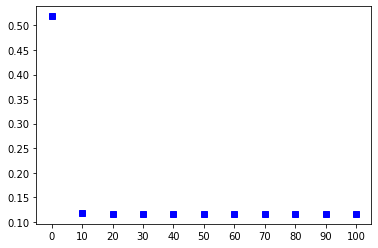

In [268]:
plt.plot([0, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],list_iteration, 'bs')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100])
plt.show()